In [1]:
# data extracted from public dataset - data.gov
# importing pandas package
import pandas as pd
import seaborn as sn
import numpy as np

if __name__ == '__main__':
    # Override default pandas configuration
    pd.options.display.width = 0
    pd.options.display.max_rows = 10000
    pd.options.display.max_info_columns = 10000

    # converting csv file to dataframe
    df = pd.read_csv('/Users/akshay/Downloads/Provider_Relief_Fund___Accelerated_and_Advance_Payments.csv')

df

,Provider Name,State / Territory,Provider Relief Fund,AAP
0,Grand Total,NaN,1.184601e+11,1.072919e+11
1,"""D"" KLAN INC.",Nevada,2.118880e+03,0.000000e+00
2,"#A1 DIABETES & MEDICAL SUPPLY, INC.",Tennessee,4.720557e+05,0.000000e+00
3,"007 SMILES, INC",Florida,4.114275e+04,0.000000e+00
4,"02 NEAL MEDICAL, INC.",Alabama,7.764259e+04,0.000000e+00
...,...,...,...,...
408490,"ZYWIE, INC.",Georgia,8.131982e+04,9.897893e+04
408491,ZZM INVESTMENTS,Illinois,6.305400e+02,0.000000e+00
408492,ZZZ ANESTHESIA,California,2.565300e+02,0.000000e+00
408493,"ZZZ ANESTHESIA, INC",Ohio,5.536666e+04,0.000000e+00


In [2]:
# basic exploration
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408495 entries, 0 to 408494
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Provider Name         408495 non-null  object 
 1   State / Territory     408494 non-null  object 
 2   Provider Relief Fund  408495 non-null  float64
 3   AAP                   408495 non-null  float64
dtypes: float64(2), object(2)
memory usage: 12.5+ MB


In [3]:
# identify numeric / non numeric columns in the data
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Numeric columns: ", numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Non numeric columns: ", non_numeric_cols)

Numeric columns:  ['Provider Relief Fund' 'AAP']
Non numeric columns:  ['Provider Name' 'State / Territory']


<AxesSubplot:>

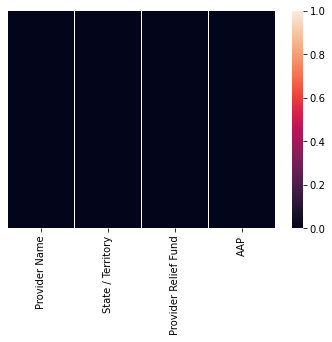

In [20]:
# visualize to see the missing value
sn.heatmap(df.isnull(), yticklabels = False)

In [5]:
# heat map shows we don't have any NaNs but looks like we have a missing value in the State / Territory
# Identifying NA values
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

df.isna().sum()

Percentage of missing values: 6.120025948910023e-05%


Provider Name           0
State / Territory       1
Provider Relief Fund    0
AAP                     0
dtype: int64

In [6]:
# dropping NA values if all rows are NA
df.dropna(how = 'all',
          inplace = True)

# Now the data looks clean
df.isna().sum()

Provider Name           0
State / Territory       1
Provider Relief Fund    0
AAP                     0
dtype: int64

In [7]:
# identify duplicates in the dataset
duplicates_before = df.duplicated().sum()
print("Total duplicates in the dataset - Before: ", duplicates_before)

Total duplicates in the dataset - Before:  0


In [8]:
# de-duplicate the data to maintain accuracy and efficiency for analysis
df.drop_duplicates(inplace=True)

duplicates_after = df.duplicated().sum()
print("Total duplicates in the dataset - After: ", duplicates_after)

Total duplicates in the dataset - After:  0


In [9]:
# filtering out only the states - exclude territories
allowed_values = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", 
               "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", 
               "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", 
               "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", 
               "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", 
               "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", 
               "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", 
               "Wisconsin", "West Virginia", "Wyoming"]

try:
    df_filtered = df[df['State / Territory'].isin(allowed_values)]
    print('Filtered only the states')
except:
    print('Exception occured')
    
df_filtered

Filtered only the states


,Provider Name,State / Territory,Provider Relief Fund,AAP
1,"""D"" KLAN INC.",Nevada,2118.88,0.00
2,"#A1 DIABETES & MEDICAL SUPPLY, INC.",Tennessee,472055.66,0.00
3,"007 SMILES, INC",Florida,41142.75,0.00
4,"02 NEAL MEDICAL, INC.",Alabama,77642.59,0.00
5,021808 LLC,Colorado,173406.92,661018.00
...,...,...,...,...
408490,"ZYWIE, INC.",Georgia,81319.82,98978.93
408491,ZZM INVESTMENTS,Illinois,630.54,0.00
408492,ZZZ ANESTHESIA,California,256.53,0.00
408493,"ZZZ ANESTHESIA, INC",Ohio,55366.66,0.00


In [10]:
# renaming the column names
df_filtered = df_filtered.rename(columns = {
    'Provider Name': 'Provider_name',
    'State / Territory': 'State',
    'Provider Relief Fund': 'Provider_relief_fund'
})

In [11]:
# dropping unneccessary columns 
to_drop = ['Provider_name',
           'AAP']

df_new = df_filtered.drop(to_drop,axis = 1)

In [21]:
# group the data based on state to split-apply-combine
g = df_new.groupby('State')

# for state, state_df in g:
#     print(state)
#     print(state_df)

In [13]:
state_sum = g.sum()
g.mean()

,Provider_relief_fund
State,
Alabama,255846.013200
Alaska,227566.914028
American Samoa,544539.161087
Arizona,207637.489128
Arkansas,287599.388247
California,214529.436104
Colorado,245336.559656
Connecticut,314540.140880
Delaware,407105.957426


In [14]:
# basic data exploration
g.describe()

Provider_relief_fund                                       \
                              count           mean           std     min   
State                                                                      
Alabama                      5447.0  255846.013200  2.190564e+06    0.00   
Alaska                       1075.0  227566.914028  1.522575e+06    0.00   
American Samoa                 46.0  544539.161087  2.675416e+06  435.13   
Arizona                      7767.0  207637.489128  2.169056e+06    0.00   
Arkansas                     3469.0  287599.388247  2.156031e+06    0.00   
California                  49892.0  214529.436104  4.395634e+06    0.00   
Colorado                     6360.0  245336.559656  2.839693e+06    0.00   
Connecticut                  5579.0  314540.140880  4.507184e+06    0.00   
Delaware                     1220.0  407105.957426  5.406800e+06    0.00   
Florida                     28337.0  179375.843581  2.448607e+06    0.00   
Georgia                     10726.0  305331.602624  3.379125e+06    0.00   
Guam                           93.0  291187.202258  1.480914e+06  135.00   
Hawaii                       2670.0  147490.988996  1.658516e+06    0.00   
Idaho                        2347.0  193584.703468  1.817967e+06    0.00   
Illinois                    15777.0  372414.890000  4.369878e+06    0.00   
Indiana                      5571.0  413298.313920  4.119354e+06    0.00   
Iowa                         3748.0  311287.204624  1.806016e+06    0.00   
Kansas                       3852.0  298434.306443  1.805827e+06    0.00   
Kentucky                     4749.0  390676.935424  3.184330e+06    0.00   
Louisiana                    6496.0  324669.901704  3.369935e+06    0.00   
Maine                        2038.0  364591.461026  3.585178e+06    0.00   
Maryland                     8301.0  266888.806011  3.102656e+06    0.00   
Massachusetts               10939.0  337224.113233  4.240715e+06    0.00   
Michigan                    13712.0  269182.193220  4.178685e+06    0.00   
Minnesota                    5684.0  386174.131992  3.993156e+06    0.00   
Mississippi                  3142.0  361651.593670  2.592663e+06    0.00   
Missouri                     6368.0  373634.609793  3.237576e+06    0.00   
Montana                      1718.0  263013.453714  1.707147e+06    1.10   
Nebraska                     2744.0  304312.586633  1.914334e+06    0.00   
Nevada                       3398.0  269658.861928  7.533972e+06    0.00   
New Hampshire                1821.0  304734.456178  2.704962e+06    0.00   
New Jersey                  16624.0  285791.296929  4.908191e+06    0.00   
New Mexico                   2083.0  300611.903000  3.554784e+06    3.50   
New York                    32828.0  406056.780611  9.783291e+06    0.00   
North Carolina               9640.0  295066.963105  4.105031e+06    0.00   
North Dakota                  959.0  374124.184515  2.150729e+06    6.07   
Ohio                        13275.0  343718.193722  4.611261e+06    0.00   
Oklahoma                     4719.0  277832.140068  2.007595e+06    0.00   
Oregon                       4722.0  249154.772662  2.962367e+06    0.00   
Pennsylvania                15668.0  370267.720511  4.187062e+06    0.00   
Puerto Rico                  6435.0   27096.790071  2.207739e+05    0.00   
Rhode Island                 1576.0  295793.205844  3.332494e+06    0.00   
South Carolina               4698.0  272942.176156  3.423620e+06    0.00   
South Dakota                 1127.0  436830.005768  3.424880e+06    1.88   
Tennessee                    7771.0  396499.183770  3.118315e+06    0.00   
Texas                       31541.0  263164.475693  3.348901e+06    0.00   
Utah                         2787.0  253725.344550  4.805505e+06    0.00   
Vermont                      1143.0  226993.372730  2.249835e+06    5.64   
Virgin Islands                123.0  179183.282439  1.058243e+06    2.63   
Virginia                     8741.0  216109.906657  2.701540e+0

In [15]:
# export the cleaned data to csv
export_data = df_new.to_csv('/Users/akshay/Downloads/Cleaned_Provider_Relief_Fund___Accelerated_and_Advance_Payments.csv',
                    index = False, header = True)